# Loading

In [5]:
import tobii_research as tr
from utils import *

def get_tracker():
  all_eyetrackers = tr.find_all_eyetrackers()

  for tracker in all_eyetrackers:
    print("Model: " + tracker.model)
    print("Serial number: " + tracker.serial_number) 
    print(f"Can stream eye images: {tr.CAPABILITY_HAS_EYE_IMAGES in tracker.device_capabilities}")
    print(f"Can stream gaze data: {tr.CAPABILITY_HAS_GAZE_DATA in tracker.device_capabilities}")
    return tracker

tracker = get_tracker()

Model: Tobii Pro Fusion
Serial number: TPFC6-010203104285
Can stream eye images: True
Can stream gaze data: True


In [20]:
data, dict = build_dataset(tracker, 'cat')
data.head()

,device_time_stamp,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_trackbox_coordinate_system,left_gaze_origin_validity,right_gaze_point_on_display_area,right_gaze_point_in_user_coordinate_system,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_trackbox_coordinate_system,right_gaze_origin_validity,type
timestep_1,1716972897,586765585980,"(0.7419873476028442, 0.5243301391601562)","(45.655399322509766, 60.82600021362305, 11.497...",1,4.135773,1,"(-28.9008846282959, -26.083816528320312, 644.2...","(0.5606653690338135, 0.5570693612098694, 0.439...",1,"(0.7003577351570129, 0.5640066266059875)","(37.80118942260742, 56.42957305908203, 9.89688...",1,4.097809,1,"(30.950809478759766, -25.99258041381836, 644.8...","(0.43526363372802734, 0.5564342737197876, 0.44...",1,cat
timestep_2,1717489589,586766102866,"(0.8015064001083374, 0.5047875642776489)","(56.88477325439453, 62.991458892822266, 12.285...",1,4.188217,1,"(-30.420856475830078, -26.51778793334961, 642....","(0.5639997720718384, 0.5580577850341797, 0.436...",1,"(0.7520734667778015, 0.48643699288368225)","(47.558345794677734, 65.02481079101562, 13.025...",1,4.172745,1,"(29.47134780883789, -26.408451080322266, 643.6...","(0.4382213354110718, 0.5573756098747253, 0.437...",1,cat
timestep_3,1717972938,586766586050,"(0.7045406699180603, 0.5418362617492676)","(38.59037399291992, 58.88620376586914, 10.7910...",1,4.315292,1,"(-29.811492919921875, -27.53202247619629, 641....","(0.5628430247306824, 0.5602424740791321, 0.433...",1,"(0.6671996116638184, 0.5561819672584534)","(31.545305252075195, 57.29661178588867, 10.212...",1,4.262375,1,"(30.011070251464844, -27.540491104125977, 642....","(0.4369487762451172, 0.5598029494285583, 0.435...",1,cat
timestep_4,1717972938,586766586050,"(0.7045406699180603, 0.5418362617492676)","(38.59037399291992, 58.88620376586914, 10.7910...",1,4.315292,1,"(-29.811492919921875, -27.53202247619629, 641....","(0.5628430247306824, 0.5602424740791321, 0.433...",1,"(0.6671996116638184, 0.5561819672584534)","(31.545305252075195, 57.29661178588867, 10.212...",1,4.262375,1,"(30.011070251464844, -27.540491104125977, 642....","(0.4369487762451172, 0.5598029494285583, 0.435...",1,cat
timestep_5,1719014654,586767627758,"(1.0126335620880127, 0.1942341923713684)","(96.71780395507812, 97.40277862548828, 24.8099...",1,3.839386,1,"(-25.986427307128906, -27.17154884338379, 642....","(0.5547689199447632, 0.559442937374115, 0.4341...",1,"(0.9491952657699585, 0.12899237871170044)","(84.7490005493164, 104.63201141357422, 27.4411...",1,3.843842,1,"(33.821834564208984, -27.706892013549805, 643....","(0.4290734529495239, 0.5600647926330566, 0.438...",1,cat


In [19]:
data.to_csv("lam_looking_rightUpDiagonal.csv")

# Visualizations

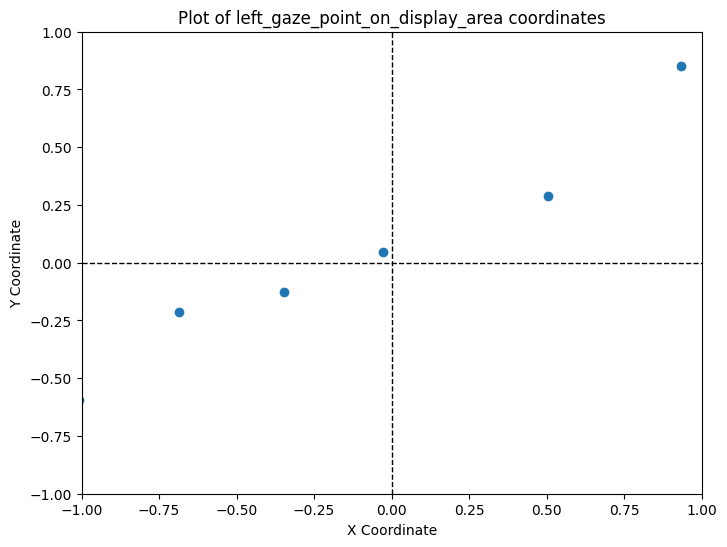

In [37]:
from matplotlib import pyplot as plt

# plot coordinates (you can use this for testing or for funsies)
# takes in a dataframe (call build_dataset first)
#          and a column_name (string)

def translate2ScreenX(xcoord):
    return 2*xcoord - 1

def translate2ScreenY(ycoord):
    return -2*ycoord + 1

def plot_coordinates(dataframe, column_name):
    # extract x and y coordinates from the specified column
    x_values = [point[0] for point in dataframe[column_name]]
    y_values = [point[1] for point in dataframe[column_name]]
    x_values = list(map(translate2ScreenX, x_values))
    y_values = list(map(translate2ScreenY, y_values))

    
    # plot the coordinates
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, marker='o', label=column_name)
    plt.title(f'Plot of {column_name} coordinates')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    plt.show()
    
plot_coordinates(data, 'left_gaze_point_on_display_area')


# Make eye detection functions

In [28]:
# example
# function should accept a dictionary of gaze data (look at what the gaze_data function returns)
# when we call build_dataset, we also make a call to gaze_data, so we'll be able to 
# modify build_dataset to check for movement detection at every timestep.

# things to consider:
# this sample code only takes in one row/timestep
# if we want to use acceleration or speed of eye movements,
# we need to look at multiple rows at a time



def detect_movement_example(data_dict):
    # data_dict should only have 1 row
    assert(len(data_dict) == 1)  # remove this in practice, just keeping it here for initial testing
    
    # get the first (and only) row in data_dict
    eye_data = data_dict.iloc[0]
    
    # get eye coordinates
    left_x, left_y = data.left_gaze_point_on_display_area[0]
    right_x, right_y = data.right_gaze_point_on_display_area[0]
    
    # do some kind of detection
    print(left_x)
    direction = math.atan(left_y/left_x)
    magnitude = math.sqrt(left_x**2 + left_y**2)
    return direction, magnitude
    
# test your function
data2 = pd.DataFrame(data.iloc[0]).transpose()  # call build_dataset and get a row
detect_movement_example(data2)                  # call detect_movement


0.14785295724868774


True

In [ ]:
# functions
# left
# right
# up 
# down
# eye roll

In [1]:
# try incorporating your function into a modified build_dataset, 
# so you can test your movement detection function while recording data

# make modifications here:

import pandas as pd
def modified_build_dataset(tracker, label, add_on = False, df_orig = pd.DataFrame(), 
                  time_step_sec = 0.5, tot_time_min = 0.1):
    
    global global_gaze_data
    
    intervals = math.ceil((tot_time_min * 60) / time_step_sec)
    dict_list = []
    
    for _ in range(intervals):
        data = gaze_data(tracker, time_step_sec)
        dict_list.append(data)
    
    tot_dict = combine_dicts_with_labels(dict_list)
    df = pd.DataFrame(tot_dict).T
    df['type'] = label
        
    if add_on:
        df_new = pd.concat([df_orig, df])
        df_new = df_new.reset_index(drop=True)
        return df_new
    
    else:
        return df, dict_list

NameError: name 'pd' is not defined

In [1]:
from utils import build_dataset_from_csv
build_dataset_from_csv("lam_looking_left.csv", "test00")

/Users/annmarievo/Library/Mobile Documents/com~apple~CloudDocs/Documents/UW/Synaptech/Opticars/opticars/utils.py:140: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['left_pupil_diameter'].fillna("None", inplace=True)
/Users/annmarievo/Library/Mobile Documents/com~apple~CloudDocs/Documents/UW/Synaptech/Opticars/opticars/utils.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['right_pupil_diameter'].fillna("None", inplace=True)


,Unnamed: 0,device_time_stamp,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_trackbox_coordinate_system,left_gaze_origin_validity,right_gaze_point_on_display_area,right_gaze_point_in_user_coordinate_system,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_trackbox_coordinate_system,right_gaze_origin_validity,type
0,timestep_1,1251393795,586300009912,"(0.7770590782165527, 0.5302660465240479)","(52.2723388671875, 60.16826248168945, 11.25765...",1,3.968063,1,"(-32.60731887817383, -14.830509185791016, 664....","(0.5661173462867737, 0.5332939624786377, 0.483...",1,"(0.742099404335022, 0.5308240056037903)","(45.676536560058594, 60.10643005371094, 11.235...",1,4.016312,1,"(27.087200164794922, -17.86370849609375, 667.4...","(0.44556093215942383, 0.5389994382858276, 0.48...",1,test00
1,timestep_2,1251893811,586300509806,"(-0.025754651054739952, 0.22233116626739502)","(-99.19337463378906, 94.28945922851562, 23.676...",1,4.140854,1,"(-34.54977798461914, -15.024839401245117, 667....","(0.5697054266929626, 0.5336617827415466, 0.490...",1,"(-0.012542182579636574, 0.2494274377822876)","(-96.7005844116211, 91.28702545166016, 22.5839...",1,4.192245,1,"(25.172290802001953, -18.071969985961914, 669....","(0.44961994886398315, 0.5393798351287842, 0.49...",1,test00
2,timestep_3,1252410503,586301026536,"(0.3505152463912964, 0.3328867554664612)","(-28.20307159423828, 82.0391616821289, 19.2180...",1,4.177078,1,"(-34.94734573364258, -14.583173751831055, 667....","(0.570563793182373, 0.532778799533844, 0.48931...",1,"(0.3532131016254425, 0.31423211097717285)","(-27.69407081604004, 84.10623168945312, 19.970...",1,4.241455,1,"(24.73162269592285, -17.50441551208496, 669.55...","(0.45048874616622925, 0.5382461547851562, 0.49...",1,test00
3,timestep_4,1252410503,586301026536,"(0.3505152463912964, 0.3328867554664612)","(-28.20307159423828, 82.0391616821289, 19.2180...",1,4.177078,1,"(-34.94734573364258, -14.583173751831055, 667....","(0.570563793182373, 0.532778799533844, 0.48931...",1,"(0.3532131016254425, 0.31423211097717285)","(-27.69407081604004, 84.10623168945312, 19.970...",1,4.241455,1,"(24.73162269592285, -17.50441551208496, 669.55...","(0.45048874616622925, 0.5382461547851562, 0.49...",1,test00
4,timestep_5,1253443880,586302059918,"(-0.8714488744735718, -0.08900610357522964)","(-258.749267578125, 128.78765869140625, 36.233...",1,4.119034,1,"(-40.36039352416992, -15.948020935058594, 674....","(0.5806002616882324, 0.5354464650154114, 0.506...",1,"(-0.7561564445495605, -0.10524147748947144)","(-236.99722290039062, 130.58663940429688, 36.8...",1,4.459412,1,"(19.314624786376953, -18.224193572998047, 675....","(0.46167701482772827, 0.5395944118499756, 0.50...",1,test00
5,timestep_6,1253943906,586302559901,None,None,0,None,0,None,None,0,"(-1.0184719562530518, -0.09503379464149475)","(-286.4878845214844, 129.45558166503906, 36.47...",1,4.430206,1,"(19.85418701171875, -19.83327865600586, 676.73...","(0.4606475532054901, 0.5427696108818054, 0.508...",1,test00
6,timestep_7,1254460594,586303076557,"(-1.1236741542816162, 0.015319067984819412)","(-306.3362121582031, 117.2277603149414, 32.025...",1,4.137039,1,"(-37.828941345214844, -17.429882049560547, 676...","(0.5753879547119141, 0.5383567810058594, 0.509...",1,"(-1.0297735929489136, -0.10676711797714233)","(-288.6201477050781, 130.7556915283203, 36.949...",1,4.587433,1,"(22.151803970336914, -20.59770393371582, 687.3...","(0.45665213465690613, 0.5439755320549011, 0.53...",1,test00
7,timestep_8,1254460594,586303076557,"(-1.1236741542816162, 0.015319067984819412)","(-306.3362121582031, 117.2277603149414, 32.025...",1,4.137039,1,"(-37.828941345214844, -17.429882049560547, 676...","(0.5753879547119141, 0.5383567810058594, 0.509...",1,"(-1.0297735929489136, -0.10676